In [93]:
import sys
sys.path.append('../..')

import copy
import re
import csv
import codecs
from random import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import load_six_emotions, load_3_emotions, generate_corpus, tokenizer
from unsupervised.emotional_lsa import EmotionalLSA

np.random.seed(12345)

%matplotlib inline

In [94]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]


print('Loading emotional words: ')
emotion_words = load_six_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words_n = load_3_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
# emotion_words['NEUTRO'] = emotion_words_n['NEUTRO']

Loading emotional words: 


## Validação 1

Validaremos o algoritmo, adicionando o em uma das 6 emoções definidas + 1 neutro.

Utilizaremos uma base com aproximadamente 3000 frases diversas.

In [98]:
# with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases/frases_diversas.txt') as h:
    original_phrases = h.readlines()
# original_phrases = original_phrases[:100]
phrases = copy.deepcopy(original_phrases)
phrases = generate_corpus(phrases)
ldocs = [f'D{i}' for i in range(len(original_phrases))]

In [99]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words))

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 3873
--- 0.08640360832214355 seconds ---
Calculating SVD...
--- 0.47022366523742676 seconds ---
Processing emotional state...
--- 0.06010746955871582 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 0.5348632335662842 seconds ---
Calculating final emotional matrix...
--- 3.2414305210113525 seconds ---


In [100]:
df = pd.DataFrame(predicted[:len(original_phrases)], index=ldocs, columns=emotion_words.keys())

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.



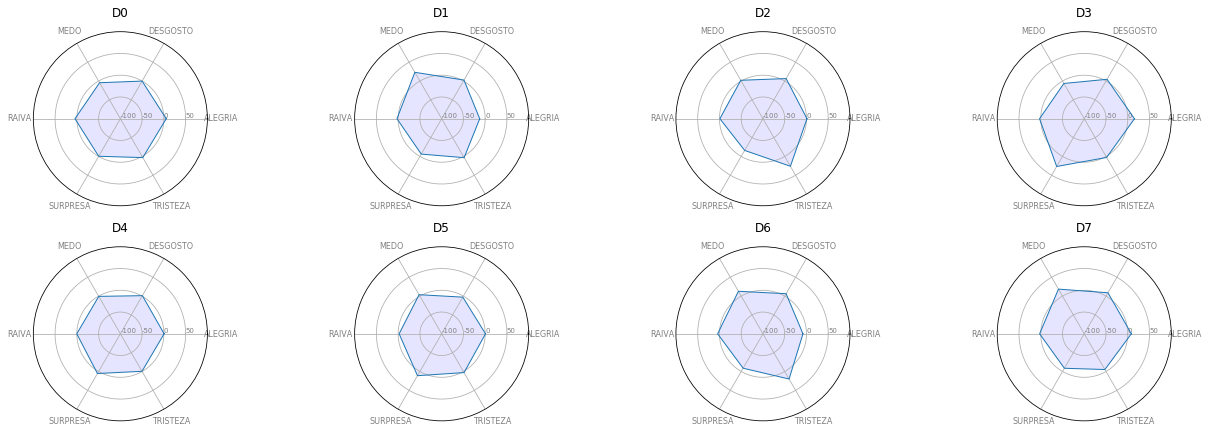

In [101]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

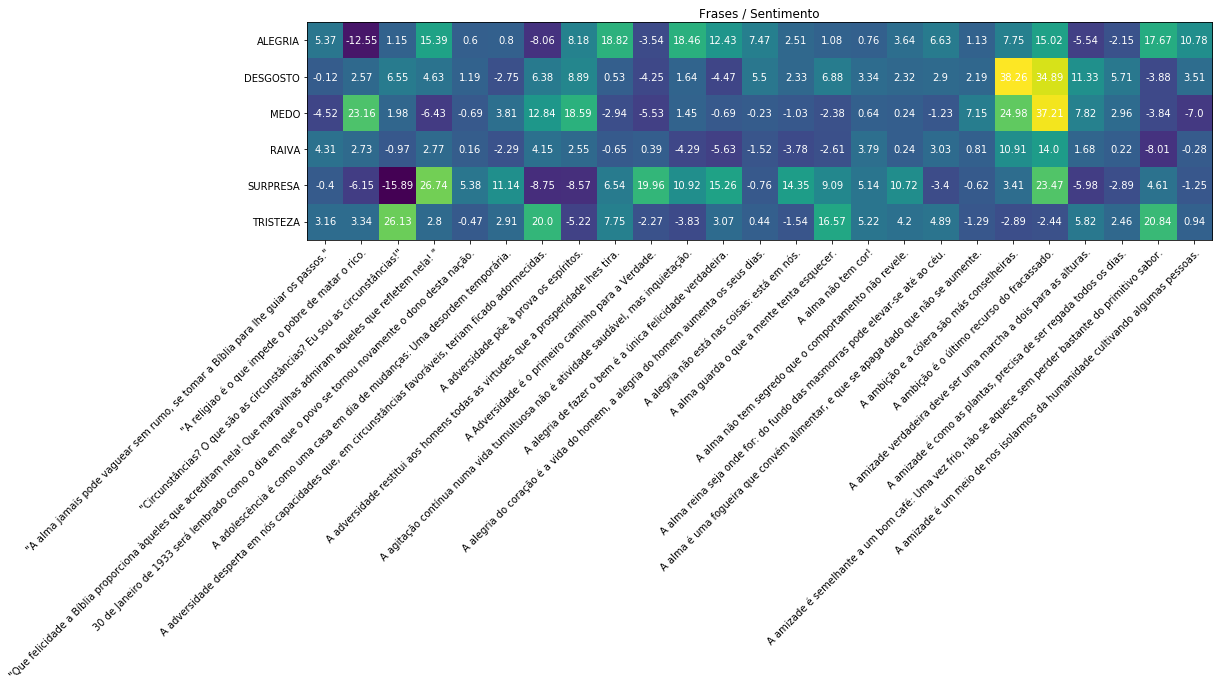

In [102]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [103]:
for i, frase in enumerate(original_phrases[:10]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

ALEGRIA     5.37
DESGOSTO   -0.12
MEDO       -4.52
RAIVA       4.31
SURPRESA   -0.40
TRISTEZA    3.16
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

ALEGRIA    -12.55
DESGOSTO     2.57
MEDO        23.16
RAIVA        2.73
SURPRESA    -6.15
TRISTEZA     3.34
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

ALEGRIA      1.15
DESGOSTO     6.55
MEDO         1.98
RAIVA       -0.97
SURPRESA   -15.89
TRISTEZA    26.13
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

ALEGRIA     15.39
DESGOSTO     4.63
MEDO        -6.43
RAIVA        2.77
SURPRESA    26.74
TRISTEZA     2.80
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro d

## Validação 2

Utilizaremos os mesmos dados, entretanto agora categorizaremos as frases acima, nas categorias POSITIVO, NEGATIVO e NEUTRO.

In [104]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words_n))
    
size = len(original_phrases)
df = pd.DataFrame(predicted, index=ldocs, columns=emotion_words_n.keys())

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 3873
--- 0.09036469459533691 seconds ---
Calculating SVD...
--- 0.54429030418396 seconds ---
Processing emotional state...
--- 0.10469722747802734 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 1.446300983428955 seconds ---
Calculating final emotional matrix...
--- 1.7098252773284912 seconds ---


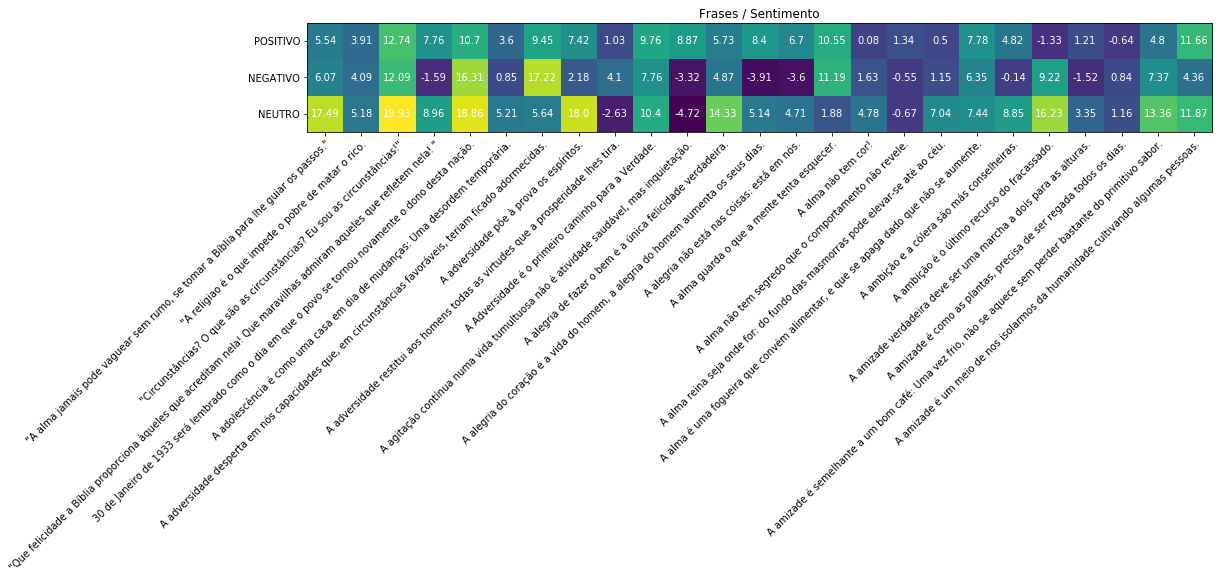

In [105]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.

D8 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.

D9 - A Adversidade é o primeiro caminho para a Verdade.

D10 - A agitação contínua numa vida tumultuosa não é atividade saudável, mas inquietação.

D11 - A alegria de fazer o bem é a única felicidade verdadeira.

D12 -

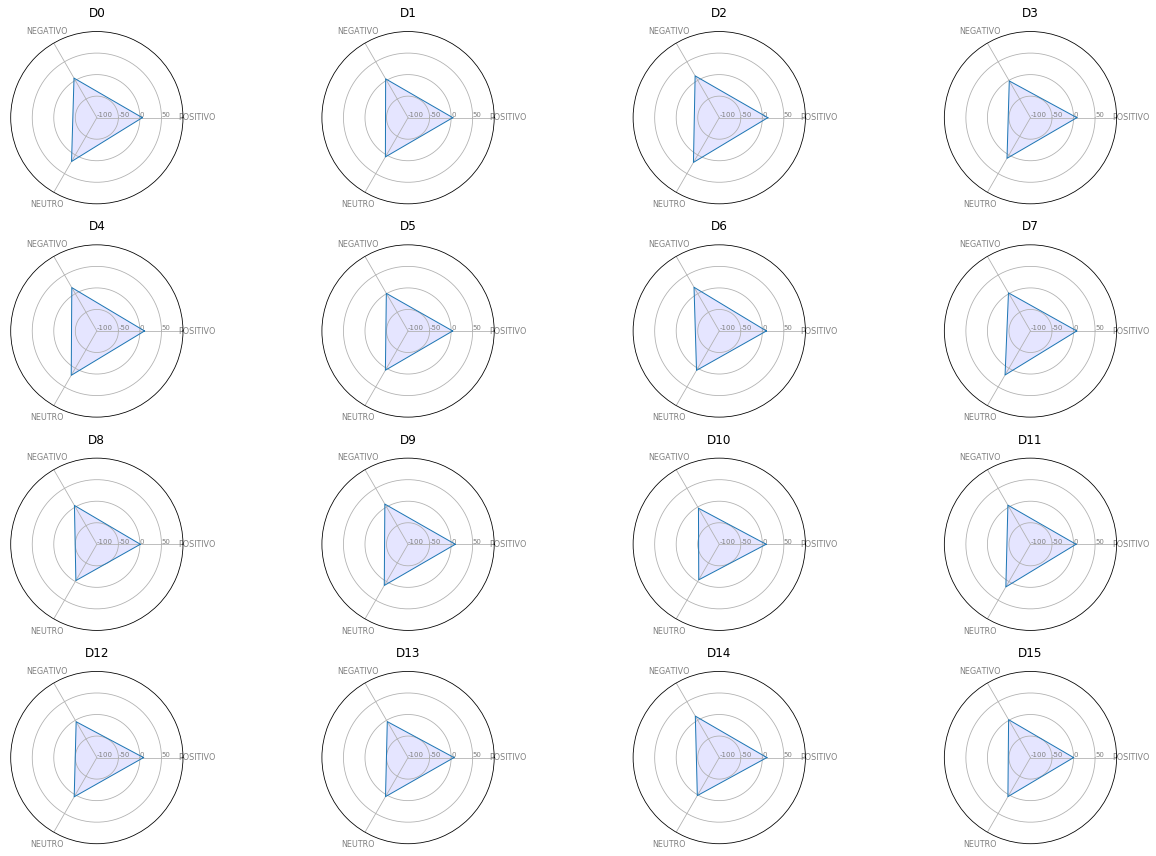

In [106]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(16):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [107]:
for i, frase in enumerate(original_phrases[:25]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

POSITIVO     5.54
NEGATIVO     6.07
NEUTRO      17.49
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

POSITIVO    3.91
NEGATIVO    4.09
NEUTRO      5.18
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

POSITIVO    12.74
NEGATIVO    12.09
NEUTRO      19.93
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

POSITIVO    7.76
NEGATIVO   -1.59
NEUTRO      8.96
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

POSITIVO    10.70
NEGATIVO    16.31
NEUTRO      18.86
Name: D4, dtype: float64
--------------------
D5 - A adolescência é como um

## Validação 

Validaremos o algoritmo em uma base de 40000 tweets coletados. Dessa base de 40000, serão utilizados apenas 2000 pela grande quantidade de dados e a limitação de hardware que possuímos, os dados serão categorizados em POSITIVO, NEGATIVO e NEUTRO.

In [110]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets-tratados-polaridade-10-10-2018.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1].strip()
        tweet_sent = row[2]
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents += [tweet_sent]        

print('Starting NLP clean up...')
tweets = [tokenizer(tweet) for tweet in original_tweets[:20000]]
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [111]:
print(original_tweets[:10])
print(tweets[:10])

['WildCat, o robot de quatro patas que corre a 25km/hora -', 'Parem de olhar para o meu telemovel quando estou a tweetar :)', '@scrismelo Porque ainda não acordaste?!', '@TejoPaulo boa opção!', 'RT @joaomhenrique: O corte nas pensões de sobrevivência é um incentivo às viúvas para que saiam da sua zona de conforto e arranjem um novo …', '@catie_mpc AI DEUS. VOU JA PÔR AQUILO. f-se, um Louis português é o meu fucking sonho', '@joao_paquete fica com a tua opinião ahah', '@soutaosocial tens os links?', 'Nunca podia ser vegetariano, este cheiro a churrasco está a torturar-me lentamente....', 'RT @danielolivalx: E agora, a TSU das viúvas']
['wildcat robot quatr pat corr hor', 'par olhar telemovel twet', 'scrismel porqu aind nã acord', 'tejopaul bom opçã', 'joaomhenriqu cort pensã sobrevivent incentiv viúv sair zon confort arranj nov', 'cati mpc deus ir pôr lou português fucking sonh', 'joa paquet fic opiniã ahah', 'soutaosocial ter link', 'nunc pod ser vegetarian cheir churrasc tortur lent',

In [112]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 14527
--- 0.448436975479126 seconds ---
Calculating SVD...
--- 6.666841745376587 seconds ---
Processing emotional state...
--- 0.26239728927612305 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 6.491621971130371 seconds ---
Calculating final emotional matrix...
--- 10.194149255752563 seconds ---


In [113]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

### Acurácia

Como essa base já esta categorizada, será validada a acurácia do algoritmo implementado, verificando o resultado obtido e comparado com a categoria da frase.

In [114]:
accuracy = 0
change_sent = [('POSITIVE', 'POSITIVO'), ('NEGATIVE', 'NEGATIVO'), ('NEUTRAL', 'NEUTRO')]
for i, frase in enumerate(tweets):
    for org, new in change_sent:
        sentimento_original = sents[i].upper()
        if sentimento_original == org:
            sentimento_original = new
            break
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100)
print(f'Accuracy: {accuracy}%')

Accuracy: 40.0%


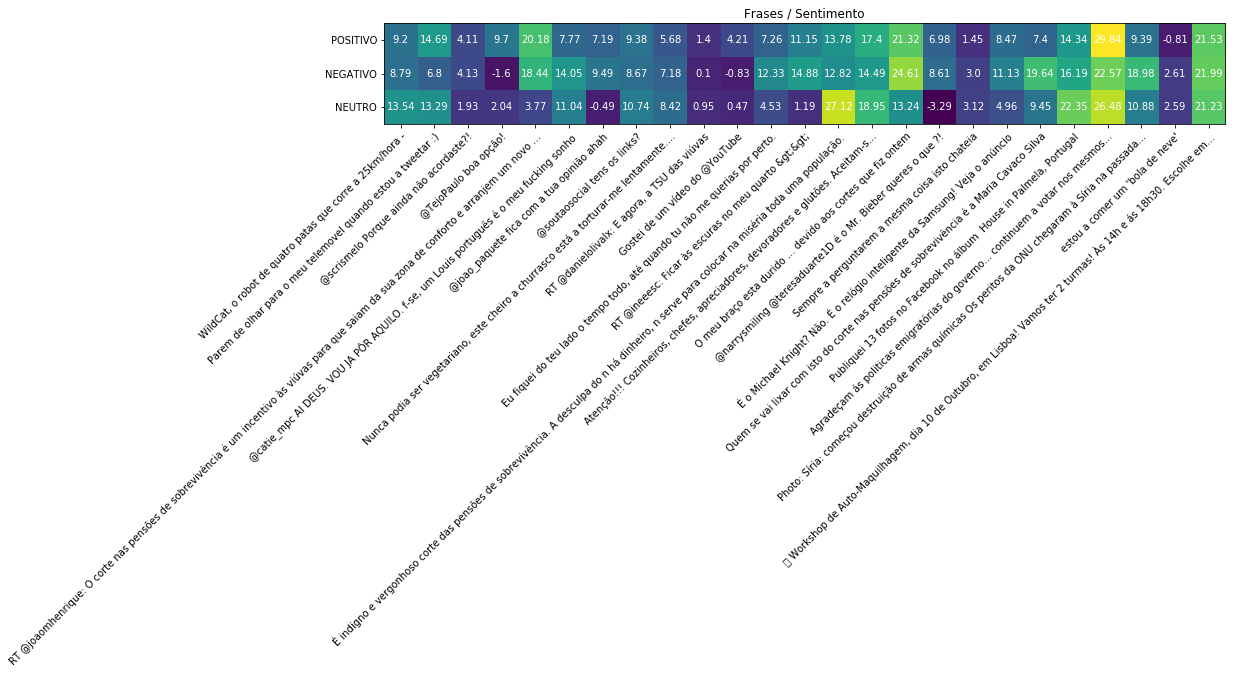

In [115]:
N = 25

categories = list(df)
k_phrases = original_tweets[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [116]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - WildCat, o robot de quatro patas que corre a 25km/hora -
ORIGINAL : NEUTRAL
CALCULADO : NEUTRO
POSITIVO     9.20
NEGATIVO     8.79
NEUTRO      13.54
Name: D0, dtype: float64
--------------------
D1 - Parem de olhar para o meu telemovel quando estou a tweetar :)
ORIGINAL : POSITIVE
CALCULADO : POSITIVO
POSITIVO    14.69
NEGATIVO     6.80
NEUTRO      13.29
Name: D1, dtype: float64
--------------------
D2 - @scrismelo Porque ainda não acordaste?!
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO    4.11
NEGATIVO    4.13
NEUTRO      1.93
Name: D2, dtype: float64
--------------------
D3 - @TejoPaulo boa opção!
ORIGINAL : NEUTRAL
CALCULADO : POSITIVO
POSITIVO    9.70
NEGATIVO   -1.60
NEUTRO      2.04
Name: D3, dtype: float64
--------------------
D4 - RT @joaomhenrique: O corte nas pensões de sobrevivência é um incentivo às viúvas para que saiam da sua zona de conforto e arranjem um novo …
ORIGINAL : NEUTRAL
CALCULADO : POSITIVO
POSITIVO    20.18
NEGATIVO    18.44
NEU

### Validação 4

Nesta validação, será utilizado outro conjunto de tweets já previamente categorizados, também com valência POSITIVO, NEGATIVO e NEUTRO.

In [117]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets_mg2.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[0].strip()
        tweet_sent = row[1].upper()
        if len(tweet) > 5:
            original_tweets.append(tweet)
            sents.append(tweet_sent)

In [118]:
print('Starting NLP clean up...')
tweets = [tokenizer(tweet) for tweet in original_tweets[:17000]]
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [119]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, emotion_words_n)

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 9540
--- 0.16886091232299805 seconds ---
Calculating SVD...
--- 1.183359146118164 seconds ---
Processing emotional state...
--- 0.14751076698303223 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 5.391126871109009 seconds ---
Calculating final emotional matrix...
--- 2.647007703781128 seconds ---


In [120]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

In [121]:
accuracy = 0
for i, frase in enumerate(tweets):
    sentimento_original = sents[i].upper()
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100, 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 25.76%


In [122]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - bom é bandido morto Deputado Cabo Júlio é condenado e fica inelegível por 10 anos - Politica - Estado de Minas https://t.co/3GfAqvrFHS
ORIGINAL : NEUTRO
CALCULADO : NEGATIVO
POSITIVO    21.23
NEGATIVO    28.69
NEUTRO       8.84
Name: D0, dtype: float64
--------------------
D1 - Um cabo da Polícia Militar (PM) de 35 anos, que estava de folga, impediu um roubo a padaria na noite desta... https://t.co/3bpapjIJCh|Positivo
..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." https://t.co/fN5evlLQsR
ORIGINAL : NEUTRO
CALCULADO : POSITIVO
POSITIVO    19.27
NEGATIVO    18.82
NEUTRO      17.03
Name: D1, dtype: float64
--------------------
D2 - @JornalOGlobo: Com três anos, presídio privado em Minas Gerais não teve rebeliões. https://t.co/0ABNs6zveF https://t.co/OUIXRNZu92
ORIGINAL : POSITIVO "PROCURADO POR MINAS, TRAFICANTE É PRESO EM AÇÃO NO GUAÇU. " HTTPS://T.CO/ZRAEF33T5X VIA @
CALCULADO : NEGATIVO
POSIT

## Validação 5

Nesta validação, será utilizado um dataset taggeado manualmente pelo Edgar e Rodolfo (eu)... Este dataset contém apenas 50 itens balanceados entre POSITIVO, NEGATIVO e NEUTRO.

In [123]:
original_tweets = []
sents1 = []
sents2 = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/50_tweets_mg.csv'
with codecs.open(filename, encoding="utf-8") as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1].strip()
        tweet_sent1 = row[2].upper()
        tweet_sent2 = row[3].upper()
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents1 += [tweet_sent1]
            sents2 += [tweet_sent2]

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets)
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [124]:
inter_ltweets = [f'D{i}' for i in range(len(tweets))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=False)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))
df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())

accuracy1 = 0
accuracy2 = 0
for i, frase in enumerate(tweets):
    sentimento_original1 = sents1[i]
    sentimento_original2 = sents2[i]
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original1 == calculado:
        accuracy1 += 1
    if sentimento_original2 == calculado:
        accuracy2 += 1
accuracy1 = np.round((accuracy1 / len(tweets)) * 100, 2)
accuracy2 = np.round((accuracy2 / len(tweets)) * 100, 2)
print(f'Accuracy 1: {accuracy1}%')
print(f'Accuracy 2: {accuracy2}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy 1: 48.0%
Accuracy 2: 50.0%


In [125]:
inter_ltweets = [f'D{i}' for i in range(len(tweets))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=False, debug=False)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))
df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())

accuracy1 = 0
accuracy2 = 0
for i, frase in enumerate(tweets):
    sentimento_original1 = sents1[i]
    sentimento_original2 = sents2[i]
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original1 == calculado:
        accuracy1 += 1
    if sentimento_original2 == calculado:
        accuracy2 += 1
accuracy1 = np.round((accuracy1 / len(tweets)) * 100, 2)
accuracy2 = np.round((accuracy2 / len(tweets)) * 100, 2)
print(f'Accuracy 1: {accuracy1}%')
print(f'Accuracy 2: {accuracy2}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy 1: 50.0%
Accuracy 2: 52.0%


## Validação Dataset PUC-PR

Fornecido pela equipe da PUC-PR através do site [EMOÇÕES.BR](http://www.ppgia.pucpr.br/~paraiso/mineracaodeemocoes/index.php), contém cerca de 1000 frases, categorizadas usando as 6 emoções de Ekman (alegria, surpresa, tristeza, medo, raiva, desgosto).

In [126]:
def carregar(filename):
    frases = []
    with open(filename, 'r') as h:
        reader = csv.reader(h, delimiter='|')
        for row in reader:
            frase = tokenizer(row[0]).strip()
            sentimento = row[1].upper()
            frases.append((sentimento, frase))
    return frases

frases = carregar('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases/g1_v1.csv')
shuffle(frases)

phrases = []
for sentimento, frase in frases:
    phrases.append(frase)

print(phrases[:5])

['motociclet bomb mat iraqu atac ocorr próxim cinem merc bagd fic fer pesso segund políc', 'ameac tecnolog tropeçã fio panc cresc estud realiz eua consider acident períod ano cerc mil nort american vítim dess problem ano', 'mort policial suspeit grip afast pelotã sold pelotã oper especial interromp ativ policial morr sintom nov grip diz secretári saud', 'sen divulg nov integr conselh étic grup ir analis represent quebr decor contr sarney soment banc aind nã indic faz part conselh', 'onça obes pat oper guarulh objet reabilit pat implant fio cirúrg animal romp ligament caus sedentar obes']


In [127]:
inter_lphrases = [f'D{i}' for i in range(len(phrases))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words))
df = pd.DataFrame(predicted, index=inter_lphrases, columns=emotion_words.keys())

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 4056
--- 0.06398987770080566 seconds ---
Calculating SVD...
--- 0.48625755310058594 seconds ---
Processing emotional state...
--- 0.08421897888183594 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 0.30576205253601074 seconds ---
Calculating final emotional matrix...
--- 1.3656065464019775 seconds ---


In [128]:
accuracy = 0
missed = 0
for i, frase in enumerate(phrases):
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if calculado == frases[i][0]:
        accuracy += 1
    else:
        missed += 1
accuracy = np.round((accuracy / len(phrases)) * 100, 2)
missed = np.round((missed / len(phrases)) * 100, 2)
print(f'Accuracy: {accuracy}%')
print(f'Missed: {missed}%')

Accuracy: 22.26%
Missed: 77.74%
